In [1]:
import numpy as np
import sqlite3 as db
import pandas as pd
from lsst.sims.utils import angularSeparation
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Define a point to look around
ra = 20
dec = -40

radius = 1.75
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}

In [3]:
filenames = ['baseline_1exp_pairsmix_10yrs.db', 'roll_mod3_sdf0.10mixed_10yrs.db', 'very_alt3_rm5illum15_10yrs.db']

baseline_1exp_pairsmix_10yrs.db 1138
roll_mod3_sdf0.10mixed_10yrs.db 1141
very_alt3_rm5illum15_10yrs.db 1059


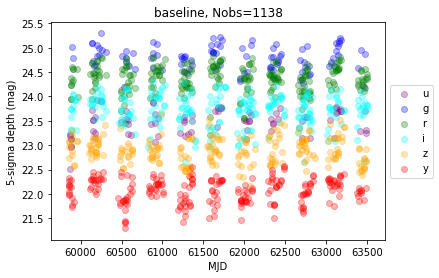

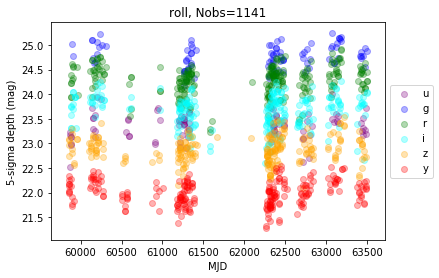

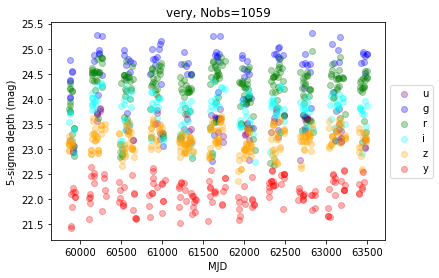

In [4]:
for i,filename in enumerate(filenames):
    conn = db.connect(filename)
    df = pd.read_sql('select * from summaryallprops;', conn)
    
    ang_dist = angularSeparation(df['fieldRA'].values, df['fieldDec'].values, ra, dec)
    overlapping = np.where(ang_dist < radius)[0]
    df_sub = df.iloc[overlapping, :]
    fig, ax = plt.subplots()
    for filtername in filter_colors:
        infilt = np.where(df_sub['filter'].values == filtername)
        ax.scatter(df_sub['observationStartMJD'].values[infilt],
                   df_sub['fiveSigmaDepth'].values[infilt],
                   c=filter_colors[filtername], label=filtername, alpha=0.3)
    title = filename.split('_')[0] + ', Nobs=%i' % df_sub.shape[0]
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)', title=title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(filename, df_sub.shape[0])
    fig.savefig('%i.pdf' % i)


In [5]:
# What do we see in this plot. Looks like 11 seasons (the survey probably starts part way through the 
# first season, and last one is cut off)

In [6]:
df_sub

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
4070,4070,22.040456,-40.537736,59858.174314,59858.200133,30.0,z,297.925471,1,1.040321,...,7.370951,280.795022,188.740095,3.343590,-0.086749,328.102507,-17.866470,51.303221,133.488604,73.009868
4105,4105,22.040456,-40.537736,59858.189102,59858.200133,30.0,z,297.925471,1,1.026267,...,21.427831,277.454719,179.491213,3.343825,-0.086848,328.247539,-17.774702,51.251246,133.485582,73.092617
9572,9572,19.716280,-39.877437,59864.242993,59864.266884,30.0,z,52.807728,1,1.048554,...,9.359634,9.745988,149.592921,3.440636,-0.127016,44.959007,18.104143,62.578137,132.784703,83.795005
9607,9607,19.716280,-39.877437,59864.257957,59864.266884,30.0,z,52.807728,1,1.073336,...,17.564239,3.162704,142.822079,3.440877,-0.127114,45.068105,18.177306,62.684412,132.779729,83.735805
11294,11294,21.421133,-39.830075,59866.228876,59866.259060,30.0,r,46.125430,1,1.032238,...,6.033568,36.313327,156.918939,3.472669,-0.139983,70.885707,25.476916,79.918169,132.095735,70.939359
11329,11329,21.421133,-39.830075,59866.245107,59866.259060,30.0,i,46.125430,1,1.052596,...,17.945419,31.455682,148.926509,3.472931,-0.140088,71.027438,25.538096,80.043312,132.090354,70.872401
11383,11383,18.094003,-39.130194,59866.270022,59866.292018,30.0,z,75.408890,1,1.122865,...,5.073083,23.319887,138.328705,3.473334,-0.140250,71.236629,25.625714,81.570768,132.826448,70.774438
11386,11386,21.633994,-39.483905,59866.272293,59866.292018,30.0,z,70.310907,1,1.103914,...,6.908632,22.534479,137.449009,3.473371,-0.140265,71.255202,25.633320,79.879815,132.417273,70.765794
11418,11418,18.094003,-39.130194,59866.285995,59866.292018,30.0,z,75.408890,1,1.172752,...,9.716768,17.720454,132.417984,3.473592,-0.140354,71.366321,25.677707,81.684641,132.820254,70.714264
11421,11421,21.633994,-39.483905,59866.288210,59866.292018,30.0,z,70.310907,1,1.148087,...,12.087666,16.928753,131.649288,3.473628,-0.140368,71.384129,25.684638,79.990419,132.412052,70.706036


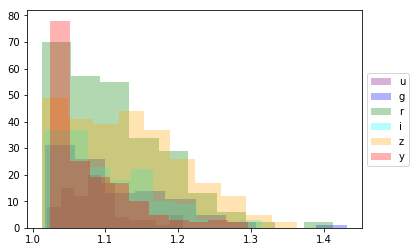

In [7]:
fig, ax = plt.subplots()
for filtername in filter_colors:
    infilt = np.where(df_sub['filter'].values == filtername)
    ack = ax.hist(df_sub['airmass'].values[infilt], color=filter_colors[filtername], alpha=.3, label=filtername) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))